## Social Networks Assignment

We begin with some of the notation introduced in the text.

$$
   \begin{array}[t]{llp{5in}}
   d(i,j)     &  &\text{the length of the shortest path between nodes $i$ and $j$}\\
  \text{N}_{j} &  & \text{the (set of) neighbors of node $j$}\\
   \mid \text{N}_{j} \mid &  & \text{the number of neighbors node $j$ has in the graph}\\
   \text{E}(\text{S}) &  & \text{the set of edges for some set of nodes S}\\
   \text{E}(\text{N}_{j}) & & \text{the set of edges among the neighbors of $j$}\\
   \mid \text{E}(\text{N}_{j})\mid & & \text{the number of edges among the neighbors of $j$}\\
   {k \choose 2} &  \frac{k(k-1)}{2} & \text{the number of possible pairs for a set of $k$ things} \\[.05in]
   {\mid \text{N}_{j} \mid \choose 2} &\frac{\mid \text{N}_{j} \mid(\mid \text{N}_{j} \mid-1)}{2} & \text{the number of possible edges connecting neighbors of $j$} \\[.05in]
   \text{APL}(\text{G}) & \frac{1}{{N \choose 2}} \sum_{i,j} d(i,j) &\text{the average path length in graph G, the sum of the shortest paths between all node
                                                   pairs,}\\
                            & & \text{divided by ${{N \choose 2}}$, the number of node pairs in graph G}
   \end{array}
$$


Note that $i$ is not in the neighborhood set $\text{N}_{i}$.
Then the **clustering coefficient** for a **node** $i$, 
written $\text{C}_{i}$, is defined as

$$
\text{C}_{i} = \frac{\mid \text{E}(\text{N}_{i}) \mid}{ {\mid \text{N}_{i} \mid \choose 2}}
$$

As stated above 

$${\mid \text{N}_{i} \mid \choose 2}$$

is the maximum possible number of edges connecting neighbors of $i$ (the number
of edges there would be if all of $i$s friends knew each other),
so $\text{C}_{i}$ is the number of **actual** edges between
neighbors of :math:`i` divided by the maximum **possible** number of
edges between neighbors of $i$.  The clustering
coefficient of a **graph** is just the average of this number for all 
nodes in a graph.

As an example,  consider the following graph (similar to the one discussed in the text):


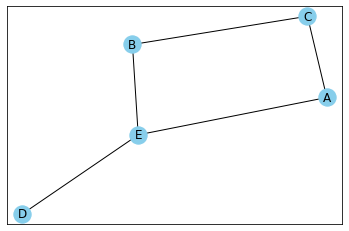

In [ ]:
import networkx as nx
G = nx.Graph()


# This is the one we'll start with for this problem set
edges = \
"""
D E
E B
E A
C A
C B
"""
G = nx.parse_edgelist(edges.split('\n'))
nx.draw_networkx(G,node_color='skyblue')

**Q1**

Using `G` as draw above, write out the betweenness centrality calculation for node E, using the
definition of betweenness centrality for a node given in the
text chapter.

We reproduce that definition here, for convenience:

We define the **betweenness centrality** of node $j$, $\text{Betweenness}_{j}$ as

$$
   \begin{array}[t]{l}
   \text{Betweenness}_{j} = \sum_{i\neq j\neq k} \frac{\sigma_{ik}(j)}{\sigma_{ik}},
   \end{array}
$$

Here $\sigma_{ik}$ is the total number of shortest paths
from $i$ to $k$; and  $\sigma_{ik}(j)$ is the total
number of such paths which pass through $j$.  The expression
to the right of $\sum$ is proportion of all shortest paths
between $i$ and $k$ that pass through $j$.
The symbol $\sum$ indicates
we sum that quantity for various $i$ and $k$, and
the little subscript tells us $i\neq j\neq k$; that is, we find that quantity
for all distinct nodes $i,k$ in the graph that are different from $j$.

And we add up the results.  Roughly what we're calculating is: What proportion
of the shortest paths in the graph pass through $j$? Or what proportion
of the traffic taking a shortest path journey has to pass through $j$. 

To see an example of writing out the calculation (on a different graph!) 
look back at the textbook discussion.


**Q2**

How does the betweenness computation for node E in G 
change if we add an edge between C and E as shown in the cell below?


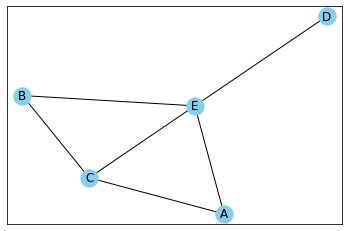

In [ ]:
edges2 = \
"""
D E
E B
E A
C A
C B
C E
"""
G2 = nx.parse_edgelist(edges2.split('\n'))
nx.draw_networkx(G2,node_color='skyblue')

**Q3**

How does the betweenness computation for node E change if we add an edge between A  and B as shown in the cell below?

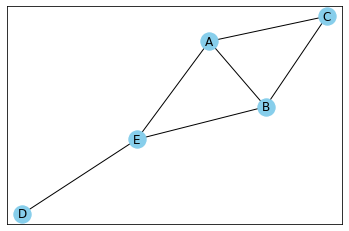

In [ ]:
edges3 = \
"""
D E
E B
E A
C A
C B
A B
"""
G3 = nx.parse_edgelist(edges3.split('\n'))
nx.draw_networkx(G3,node_color='skyblue')

**Q4**

Betweenness centrality is often normalized to give a score between 0 and 1. To see how this works, note that each of the terms in the betweenness sum is a number between 0 and 1. We just take their average. All the examples above involve the same number of nodes, therefore the same number of pairs, so in all cases we divide by 6. For the first example, 3.5/6 is .583. The general expression for the number of possible pairs of k things is given in the table above:

$\frac{k(k-1)}{2}$

If we have a graph of n nodes, the betweenness computation for any one of them will involve n-1 other nodes, so the number of possible pairs of n-1 things is

$\frac{(n-1)(n-2)}{2}$

For example, the graph above has 5 nodes, so in computing the betweeneness of any node j, we have $\frac{(5-1)(5-2)}{2} = 6$ pairings of other nodes. The normalized betweenness divides the betweenness by that number to get the average betweenness score for paths through j.

$$
\begin{array}[t]{l}
\text{Norm-Betweenness}_{j} = \frac{2}{(n-1)(n-2)} \sum_{i\neq j\neq k} \frac{\sigma_{ik}(j)}{\sigma_{ik}},
\end{array}
$$

Compute the normalized betweenness for the **graph** in Question 2.

**Q5** What is the **degree centrality** of node E in the graph in Question 2?
Show your calculation.  Use `networkx` to check your calculation (the `degree_centrality`
function is demoed un the using_networkx.ipynb notebook.)

**Q6** What is the clustering coefficient for node E in the graph in Question 2?
Show your calculation.
Use `networkx` to check your calculation.


The **clustering coefficient** for a **node** $i$, 
written $\text{C}_{i}$, is defined as
$$
\text{C}_{i} = \frac{\mid \text{E}(\text{N}_{i}) \mid}{ {\mid \text{N}_{i} \mid \choose 2}}
$$
The notation $\text{N}_{i}$, read "neighbor set" as explained above, stands for the set of neighbors of $i$
Note that $i$ is not in the neighbor set $\text{N}_{i}$.

As stated above 

$${\mid \text{N}_{i} \mid \choose 2}$$

is the maximum possible number of edges connecting neighbors of $i$ (the number
of edges there would be if all of $i$s friends knew each other),
so $\text{C}_{i}$ is the number of **actual** edges between
neighbors of $i$ divided by the maximum **possible** number of
edges between neighbors of $i$.  The clustering
coefficient of a **graph** is just the average of this number for all 
nodes in a graph.


**Q7** What is the average shortest path length in the graph in Question 2? 
Show your calculations.  Use networkx to check your calculations.
Look [here](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html)
in the `networkx` docs for a discussion of `nx.average_shortest_path_length`.

### More on clustering coefficients

The value of the clustering coefficient is one of the properties that distinguishes random graphs from social networks. In the next few cells we load the karate graph and create a random graph.  Compute the clustering coefficent of both using `networkx`. Try to **guess** the clustering coefficient of the random graph even before you compute it.  Is the clustering coefficient of the karate graph higher or lower than that of the random graph? Is that what you expect given that social networks are small worlds?

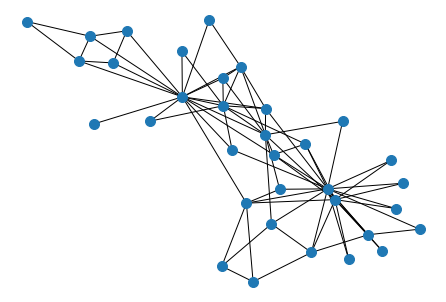

In [ ]:
import networkx as nx

kn = nx.karate_club_graph()
nx.draw_spring(kn,node_size=100)

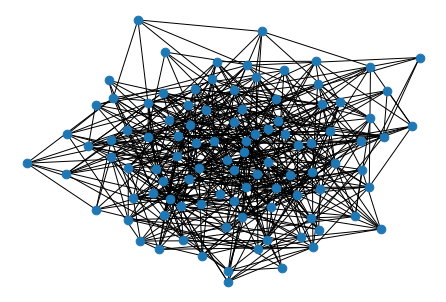

In [ ]:
G = nx.erdos_renyi_graph(100,0.11)
nx.draw_spring(G,node_size=75)

### Centrality

The next cell loads the Florentine Families Graph discussed in the new_using_networkx.ipynb notebook.
This graph is a famous graph of Florentine families (Padgett and Ansell 1993).

>Padgett, John F., and Christopher K. Ansell. "Robust Action and the Rise of the Medici, 1400-1434." American journal of sociology (1993): 1259-1319.

A link represents marriage between members of the families.


**Q1** 

Try using the betweenness centrality and degree centrality measures on the Florentine families graph.  These measures were illustrated in the new_using_networkx.ipynb notebook.  The two measures produce different centrality rankings.   Briefly describe the important differences betyween the two different centrality rankings. Be sure to sort your results for ease of comparison.   Which measure does the best job of representing the relative powers of the families? Or does neither measure  work?  

For a little background
on what the names and the graph mean, have a quick look at the Padgett and Ansell paper cited above (which is available in our library).  

Note there are a variety of possible answers.  

1. One or both of the algorithms is inappropriate for this question for this graph.  
2. Both of the algorithms are giving good answers to this question for this graph. 
3. The graph doesn't picture the right kind of relations to answer this question.

Note that the paper is about the emergence of statehood.  And that is closely related to questions
about whether power is flowing to one place.



In [ ]:
ff = nx.florentine_families_graph()

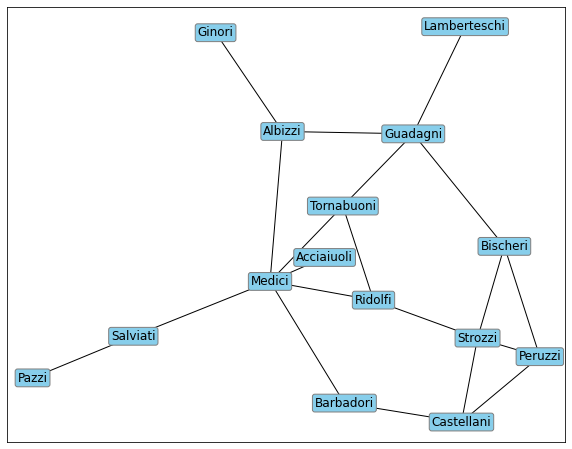

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8)) 
nx.draw_networkx(ff, with_labels=True, node_shape = 's', node_color="none", 
        bbox=dict(facecolor="skyblue", edgecolor='gray', boxstyle='round,pad=0.2'))